In [1]:
import glob
import os
import shutil

from astropy import units as u
from astropy.io import fits
from astropy.nddata import Cutout2D
import numpy as np
import pandas as pd

# Determine where the visualization will be rendered
output_notebook()

NameError: name 'output_notebook' is not defined

In [2]:
path = glob.glob('/Volumes/wfc3u/final_postflash_2021/notebooks/*flc.fits')

for f in path: 
    print(f)

/Volumes/wfc3u/final_postflash_2021/notebooks/2020_test_01_24_2022_idn073crq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2015_test_01_10_2022_icmx05qlq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2020-2021_test_01_30_2022_ie0o61lyq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2015_yearly_10_14_2022_icmx05qlq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2017_test_01_07_2022_icw806qtq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2021_test_01_27_2022_ie0o61lyq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2018-2019_test_01_26_2022_idle02ayq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2020-2021_test_01_26_2022_idn073crq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2018_test_01_27_2022_idn011e6s_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2021_yearly_10_14_2022_ie0o61lyq_flc.fits
/Volumes/wfc3u/final_postflash_2021/notebooks/2019_test_01_26_2022_idle02ayq_flc.fits
/Volumes/wfc3u/final_postflash_2021

In [53]:
image = fits.open('/Volumes/wfc3u/final_postflash_2021/notebooks/2021_test_01_27_2022_ie0o61lyq_flc.fits')
image_data = image[1].data

image_data2 = fits.getdata('/Volumes/wfc3u/final_postflash_2021/notebooks/2020-2021_test_01_30_2022_ie0o61lyq_flc.fits',1)

current_ref = fits.getdata('/Volumes/wfc3u/final_postflash_2021/notebooks/ie0o61lyq_flc-pipe.fits',1)

yearly_oct_18 = fits.getdata('/Volumes/wfc3u/final_postflash_2021/notebooks/2021_yearly_low_B_10_18_2022_ie0o61lyq_flc.fits',1)

AB_switched = fits.getdata('/Volumes/wfc3u/final_postflash_2021/notebooks/2021_yearly_low_ABSwitch_10_18_2022_ie0o61lyq_flc.fits',1)
print(type(image_data))


<class 'numpy.ndarray'>


In [5]:
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

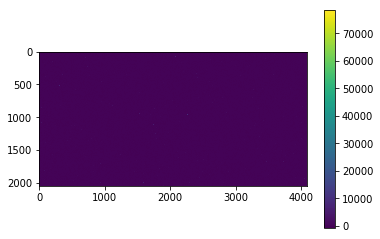

In [38]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))
print('Min:', np.min(yearly_oct_18))
print('Max:', np.max(yearly_oct_18))
print('Mean:', np.mean(yearly_oct_18))
print('Stdev:', np.std(yearly_oct_18))

Min: -618.9464
Max: 78455.234
Mean: 9.404048
Stdev: 226.21823
Min: -619.1014
Max: 78455.26
Mean: 9.410509
Stdev: 226.21823


In [8]:
print(type(image_data.flatten()))
print(image_data.flatten().shape)

<class 'numpy.ndarray'>
(8400896,)


In [10]:
print('Min:', np.min(image_data2))
print('Max:', np.max(image_data2))
print('Mean:', np.mean(image_data2))
print('Median:', np.median(image_data2))
print('Stdev:', np.std(image_data2))

Min: -619.0761
Max: 78455.19
Mean: 9.335433
Median: 1.4124737
Stdev: 226.21834


In [12]:
print(image_data.shape)

(2051, 4096)


Create cutouts

In [50]:
positions = [(220, 160), (900,700), (2100,1100), (3500,300), (3600,1700)]
position = (2100, 1100)
size = (101, 101)     # pixels

cutout = Cutout2D(image_data, position, size)
cutout1 = cutout.data

cutout_biyearly = Cutout2D(image_data2, position, size)
cutout1_biyearly = cutout_biyearly.data

cutout_curr= Cutout2D(current_ref, position, size)
cutout1_curr = cutout_curr.data

cutout_shutter= Cutout2D(AB_switched, position, size)
cutout1_shutter = cutout_shutter.data

(101, 101)


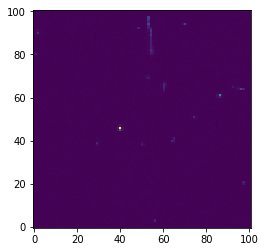

In [19]:
print('Min:', np.min(cutout1))
print('Max:', np.max(cutout1))
print('Mean:', np.mean(cutout1))
print('Median:', np.median(cutout1))
print('Stdev:', np.std(cutout1))

Min: -69.596504
Max: 9314.985
Mean: 7.871817
Median: 1.4220668
Stdev: 124.061264


(array([  1.,   0.,   1.,   1.,   1.,   0.,   2.,   4.,   1.,   2.,   3.,
          6.,   6.,   3.,   2.,   8.,   9.,  16.,  14.,  17.,  19.,  15.,
         31.,  28.,  34.,  35.,  50.,  45.,  59.,  64.,  76.,  69., 101.,
        103., 135., 141., 188., 143., 179., 145., 178., 239., 181., 194.,
        204., 235., 258., 304., 300., 323., 297., 314., 341., 310., 316.,
        296., 260., 282., 253., 254., 237., 235., 214., 214., 186., 166.,
        161., 156., 154., 126., 113., 126.,  93.,  84.,  64.,  65.,  72.,
         47.,  48.,  45.,  30.,  41.,  32.,  32.,  29.,  16.,  17.,  16.,
         12.,  11.,  10.,  11.,   7.,   9.,   5.,   3.,   6.,   1.,   4.,
          4.]),
 array([-20. , -19.6, -19.2, -18.8, -18.4, -18. , -17.6, -17.2, -16.8,
        -16.4, -16. , -15.6, -15.2, -14.8, -14.4, -14. , -13.6, -13.2,
        -12.8, -12.4, -12. , -11.6, -11.2, -10.8, -10.4, -10. ,  -9.6,
         -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,  -6.4,  -6. ,
         -5.6,  -5.2,  -4.8,  -4.4

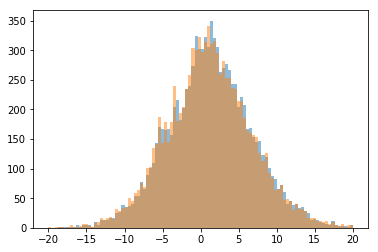

In [35]:
#plt.hist(cutout1.flatten(),alpha=0.5, range=(-20,20), bins=100)
plt.hist(cutout1_biyearly.flatten(),alpha=0.5, range=(-20,20), bins=100)
plt.hist(cutout1_curr.flatten(),alpha=0.5, range=(-20,20), bins=100)

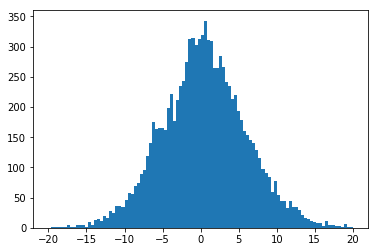

In [51]:
histogram = plt.hist(cutout1_shutter.flatten(), range=(-20,20), bins=100)

0.0

In [15]:
postflash_data = pd.read_pickle('/Volumes/wfc3u/final_postflash_2021/notebooks/Feb_2022_all_postflash_flc.pkl')

In [23]:
postflash_data.loc[postflash_data['filename']=='ielu05rmq_flc.fits']

,filename,propid,path,obsdate,obstime,shutter,flash_lvl,flash_dur,flash_cur,subarray,exp_time
rootname,,,,,,,,,,,
ielu05rmq,ielu05rmq_flc.fits,16570,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2021-12-07,14:52:00,B,7310,100.0,MED,False,0.5


,filename,propid,path,obsdate,obstime,shutter,flash_lvl,flash_dur,flash_cur,subarray,exp_time
rootname,,,,,,,,,,,
ieg845feq,ieg845feq_flc.fits,16398,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2020-12-14,20:55:49,B,7310,100.0,MED,False,0.5
idus35y6q,idus35y6q_flc.fits,15573,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2019-08-15,10:09:26,A,7310,100.0,MED,False,0.5
idus10qfq,idus10qfq_flc.fits,15573,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2019-01-02,18:39:03,B,7310,100.0,MED,False,0.5
icha16b5q,icha16b5q_flc.fits,13560,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2014-05-04,16:59:52,B,7310,100.0,MED,False,0.5
id0o09n2q,id0o09n2q_flc.fits,14372,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2016-01-06,04:39:31,A,7310,100.0,MED,False,0.5
...,...,...,...,...,...,...,...,...,...,...,...
id0o23jxq,id0o23jxq_flc.fits,14372,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2016-04-26,11:33:20,A,7310,100.0,MED,False,0.5
icrz48w2q,icrz48w2q_flc.fits,14006,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2014-12-03,14:33:38,A,7310,100.0,MED,False,0.5
icrz02brq,icrz02brq_flc.fits,14006,/grp/hst/wfc3u/final_postflash_2021/mastDownlo...,2014-12-08,02:26:10,B,7310,100.0,MED,False,0.5
